# ODE System

Consider a system of two coupled ODE
$$
y' = Ay, \qquad A = \begin{bmatrix}
-100 & 1 \\
0 & -1/10 \end{bmatrix}
$$
with initial condition
$$
y(0) = y_0
$$

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt

def f(y):
    r = np.empty_like(y)
    r[0] = -100*y[0] + y[1]
    r[1] = -y[1]/10
    return r

The following function implements the forward Euler scheme

In [6]:
def feuler(y0,h,T):
    N = int(T/h)
    y = np.ndarray((N,2))
    t = np.zeros(N)
    y[0,:]=y0
    t[0] = 0.0
    for i in range(N-1):
        y[i+1,:] = y[i,:] + h*f(y[i,:])
        t[i+1] = t[i] + h
    plt.figure(figsize=(9,4))
    plt.subplot(1,2,1)
    plt.plot(t,y[:,0])
    plt.xlabel('t')
    plt.title('First component')
    plt.subplot(1,2,2)
    plt.plot(t,y[:,1])
    plt.xlabel('t')
    plt.title('Second component')

The stability condition is
$$
|1-100h| < 1, \qquad |1-h/10| < 1
$$
which means that we need to choose $h < 1/50$. We first try with $h=0.01$

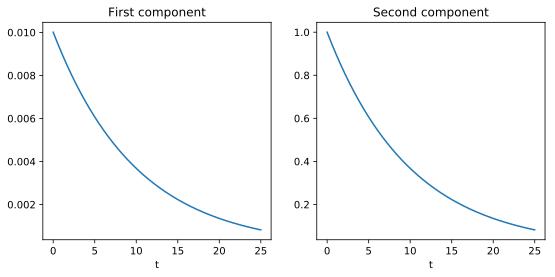

In [7]:
y0 = np.array([10.0/999.0,1.0])
T = 25.0
h = 0.01
feuler(y0,h,T)

We now try with $h=0.021$ which is slightly larger than the stability limit.

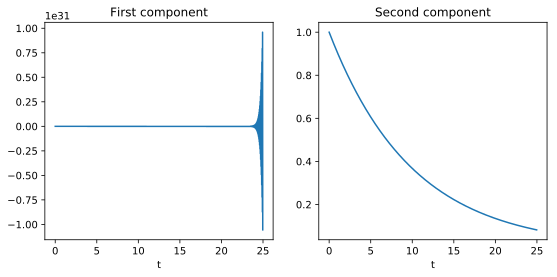

In [8]:
h = 0.021
feuler(y0,h,T)